<a href="https://colab.research.google.com/github/cavadmanafov/time-series/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-04 05:19:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-04-04 05:19:50 (10.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd 
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates = ["Date"],
                 index_col = ["Date"])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


<Axes: xlabel='Date'>

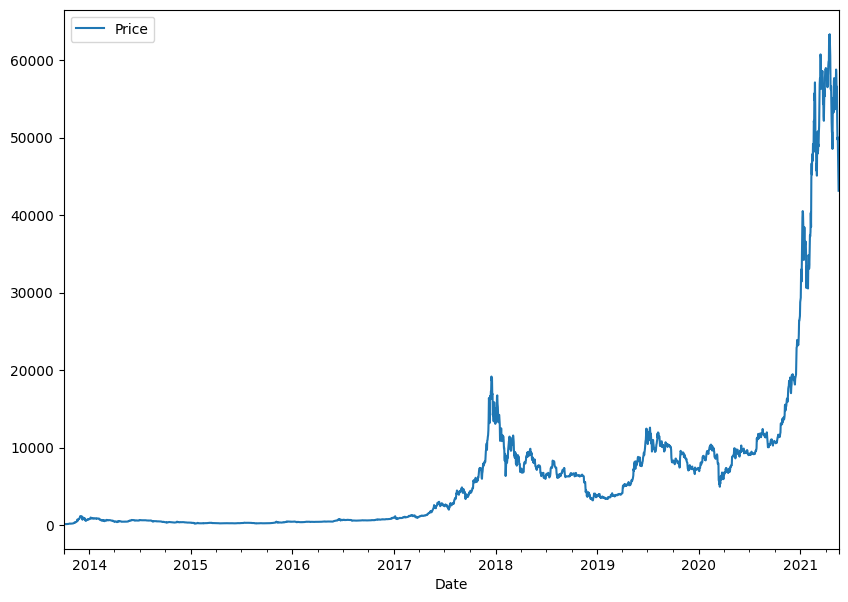

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10, 7))

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 'r') as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

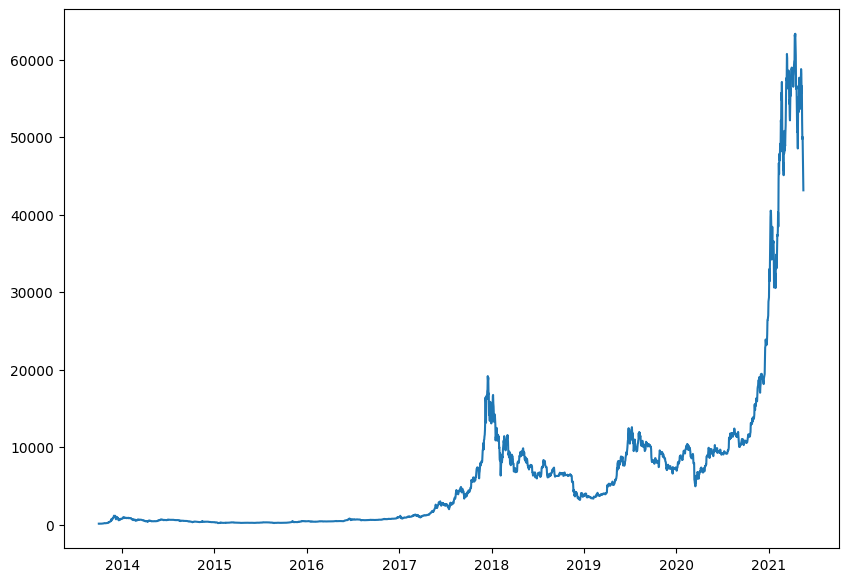

In [ ]:
import numpy as np 
plt.figure(figsize = (10, 7))
plt.plot(timesteps, btc_price)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
bitcoin_prices
timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, random_state = 42, test_size = 0.2)

In [ ]:
split_size = int(0.8 * len(prices))

In [ ]:
X_train, y_train = timesteps[:split_size], prices[:split_size]

In [ ]:
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [ ]:
def plot_time_series(timesteps, values, format = ".", start = 0, end = None, label = None):
  plt.plot(timesteps[start:end], values[start:end], format,  label = label  )
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


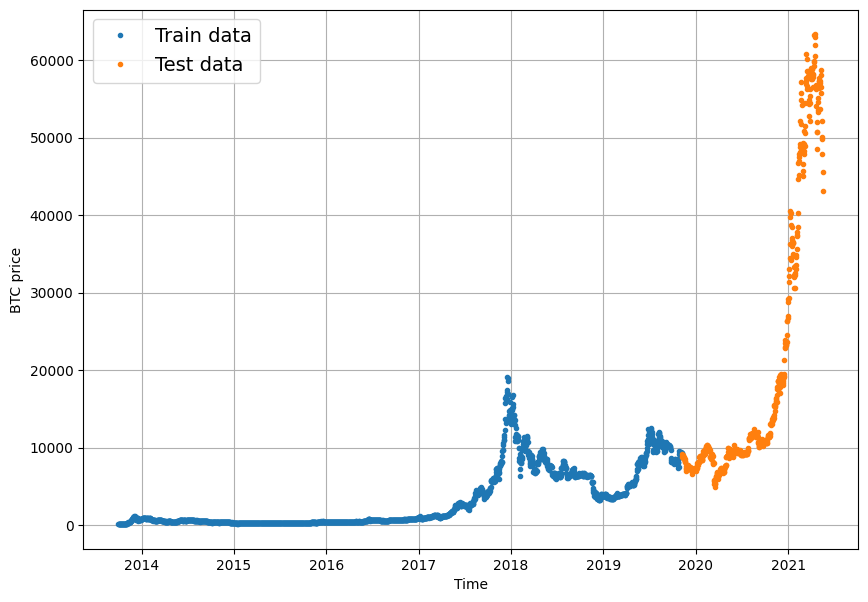

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, label = "Train data")
plot_time_series(timesteps = X_test, values = y_test, label = "Test data")

In [ ]:
naive_forecast = y_test[:-1]

In [ ]:
len(y_test[:-1])

557

In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_results(y_true, y_pred):
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)
  
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [ ]:
naive_results = evaluate_results(y_true = y_test[1:],
                                 y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
HORIZON = 1 
WINDOW_SIZE = 7

In [ ]:
def get_labelled_window(x, horizon = HORIZON):
  return x[:, :-horizon], x[:, -horizon:]


In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
tf.expand_dims(tf.range(8), axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [ ]:
def make_windows(x, window_size = WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon -1)), axis = 0).T
  print(f"Window indexes: {window_indexes, window_indexes.shape}")

  windowed_array = x[window_indexes]
  windows, labels = get_labelled_window(windowed_array, horizon = horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE,  horizon = HORIZON) 
len(full_windows), len(full_labels)

Window indexes: (array([[   0,    1,    2, ...,    5,    6,    7],
       [   1,    2,    3, ...,    6,    7,    8],
       [   2,    3,    4, ...,    7,    8,    9],
       ...,
       [2777, 2778, 2779, ..., 2782, 2783, 2784],
       [2778, 2779, 2780, ..., 2783, 2784, 2785],
       [2779, 2780, 2781, ..., 2784, 2785, 2786]]), (2780, 8))


(2780, 2780)

In [ ]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows) * (1 - test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels, 0.2)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
import os 
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only = True)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(HORIZON, activation = "linear")
], name = "model_1_dense")

model_1.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae", "mse"]
)

history_1 = model_1.fit(
    x = train_windows,
    y = train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_name = model_1.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 582.9705 - mae: 582.9705 - mse: 1309467.0000    

18/18 [==============================] - 12s 114ms/step - loss: 503.0476 - mae: 503.0476 - mse: 1025481.4375 - val_loss: 1021.6273 - val_mae: 1021.6273 - val_mse: 3428054.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 213.5734 - mae: 213.5734 - mse: 198606.0156

18/18 [==============================] - 1s 58ms/step - loss: 213.5734 - mae: 213.5734 - mse: 198606.0156 - val_loss: 971.2894 - val_mae: 971.2894 - val_mse: 3191979.2500
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 177.4407 - mae: 177.4407 - mse: 162623.2344 - val_loss: 1084.6909 - val_mae: 1084.6909 - val_mse: 3350354.5000
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 181.4683 - mae: 181.4683 - mse: 175244.3594

18/18 [==============================] - 1s 53ms/step - loss: 168.2161 - mae: 168.2161 - mse: 150917.5938 - val_loss: 918.2194 - val_mae: 918.2194 - val_mse: 2812999.7500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 169.9963 - mae: 169.9963 - mse: 109062.9531

18/18 [==============================] - 1s 33ms/step - loss: 163.2565 - mae: 163.2565 - mse: 143537.6719 - val_loss: 898.0109 - val_mae: 898.0109 - val_mse: 2671287.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 161.2531 - mae: 161.2531 - mse: 138022.7656

18/18 [==============================] - 1s 34ms/step - loss: 161.2531 - mae: 161.2531 - mse: 138022.7656 - val_loss: 887.7753 - val_mae: 887.7753 - val_mse: 2555789.2500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 197.4711 - mae: 197.4711 - mse: 293590.2812

18/18 [==============================] - 1s 31ms/step - loss: 155.9074 - mae: 155.9074 - mse: 130552.8203 - val_loss: 848.3580 - val_mae: 848.3580 - val_mse: 2405047.2500
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 151.0521 - mae: 151.0521 - mse: 123490.3047

18/18 [==============================] - 1s 32ms/step - loss: 151.0521 - mae: 151.0521 - mse: 123490.3047 - val_loss: 828.7985 - val_mae: 828.7985 - val_mse: 2333969.0000
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 134.2325 - mae: 134.2325 - mse: 83867.3047

18/18 [==============================] - 1s 34ms/step - loss: 147.3708 - mae: 147.3708 - mse: 117369.0312 - val_loss: 778.8719 - val_mae: 778.8719 - val_mse: 2033863.3750
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 140.4982 - mae: 140.4982 - mse: 109158.3516

18/18 [==============================] - 1s 35ms/step - loss: 140.4982 - mae: 140.4982 - mse: 109158.3516 - val_loss: 757.7179 - val_mae: 757.7179 - val_mse: 1943482.2500
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 135.8484 - mae: 135.8484 - mse: 88816.6484

18/18 [==============================] - 1s 32ms/step - loss: 135.3680 - mae: 135.3680 - mse: 102783.2812 - val_loss: 756.6267 - val_mae: 756.6267 - val_mse: 1858136.2500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 133.4970 - mae: 133.4970 - mse: 99642.7031 - val_loss: 843.0906 - val_mae: 843.0906 - val_mse: 2076873.2500
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5606 - mae: 127.5606 - mse: 84034.5000

18/18 [==============================] - 1s 31ms/step - loss: 136.1909 - mae: 136.1909 - mse: 101123.2109 - val_loss: 732.7017 - val_mae: 732.7017 - val_mse: 1737960.8750
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 130.4599 - mae: 130.4599 - mse: 95477.5000

18/18 [==============================] - 1s 37ms/step - loss: 130.4599 - mae: 130.4599 - mse: 95477.5000 - val_loss: 703.3032 - val_mae: 703.3032 - val_mse: 1650813.6250
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 132.9658 - mae: 132.9658 - mse: 94186.2656 - val_loss: 724.0327 - val_mae: 724.0327 - val_mse: 1674623.2500
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 127.4946 - mae: 127.4946 - mse: 89128.1797 - val_loss: 731.2705 - val_mae: 731.2705 - val_mse: 1679147.5000
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 125.6558 - mae: 125.6558 - mse: 88677.8828

18/18 [==============================] - 1s 49ms/step - loss: 123.4988 - mae: 123.4988 - mse: 86889.1406 - val_loss: 680.0149 - val_mae: 680.0149 - val_mse: 1543018.6250
Epoch 18/100
12/18 [===================>..........] - ETA: 0s - loss: 126.7410 - mae: 126.7410 - mse: 90841.4922 

18/18 [==============================] - 1s 64ms/step - loss: 122.1430 - mae: 122.1430 - mse: 86005.9453 - val_loss: 661.3857 - val_mae: 661.3857 - val_mse: 1517297.1250
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 123.3062 - mae: 123.3062 - mse: 86641.0234 - val_loss: 690.4563 - val_mae: 690.4563 - val_mse: 1540643.8750
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 120.1574 - mae: 120.1574 - mse: 83118.3750 

18/18 [==============================] - 1s 33ms/step - loss: 120.1574 - mae: 120.1574 - mse: 83118.3750 - val_loss: 644.6570 - val_mae: 644.6570 - val_mse: 1435362.1250
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 121.2461 - mae: 121.2461 - mse: 83743.2500 - val_loss: 644.7571 - val_mae: 644.7571 - val_mse: 1451482.8750
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 179.6957 - mae: 179.6957 - mse: 175869.6094

18/18 [==============================] - 1s 32ms/step - loss: 119.9624 - mae: 119.9624 - mse: 83957.6875 - val_loss: 638.7563 - val_mae: 638.7563 - val_mse: 1404870.0000
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 118.1504 - mae: 118.1504 - mse: 80741.7812

18/18 [==============================] - 1s 32ms/step - loss: 118.1504 - mae: 118.1504 - mse: 80741.7812 - val_loss: 633.8762 - val_mae: 633.8762 - val_mse: 1409634.2500
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 117.9345 - mae: 117.9345 - mse: 82182.9531

18/18 [==============================] - 1s 33ms/step - loss: 117.9345 - mae: 117.9345 - mse: 82182.9531 - val_loss: 625.3467 - val_mae: 625.3467 - val_mse: 1376291.6250
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1437 - mae: 125.1437 - mse: 66092.6094

18/18 [==============================] - 1s 32ms/step - loss: 117.3799 - mae: 117.3799 - mse: 80143.7266 - val_loss: 618.9244 - val_mae: 618.9244 - val_mse: 1351475.5000
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6122 - mae: 116.6122 - mse: 79891.0859 - val_loss: 628.3892 - val_mae: 628.3892 - val_mse: 1357227.2500
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0160 - mae: 118.0160 - mse: 78846.5234 - val_loss: 635.4652 - val_mae: 635.4652 - val_mse: 1401956.8750
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6072 - mae: 116.6072 - mse: 79159.7969 - val_loss: 619.2639 - val_mae: 619.2639 - val_mse: 1327066.6250
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2794 - mae: 114.2794 - mse: 76928.7109 - val_loss: 629.3669 - val_mae: 629.3669 - val_mse: 1344753.0000
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 134.6565 - mae: 134.6565 - mse: 

18/18 [==============================] - 1s 33ms/step - loss: 118.1459 - mae: 118.1459 - mse: 79734.3984 - val_loss: 606.2587 - val_mae: 606.2587 - val_mse: 1310822.6250
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8345 - mae: 115.8345 - mse: 76363.3672 - val_loss: 615.6916 - val_mae: 615.6916 - val_mse: 1311071.2500
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 113.6238 - mae: 113.6238 - mse: 77782.8594

18/18 [==============================] - 1s 32ms/step - loss: 113.6238 - mae: 113.6238 - mse: 77782.8594 - val_loss: 601.0078 - val_mae: 601.0078 - val_mse: 1286183.1250
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6259 - mae: 114.6259 - mse: 77116.4062 - val_loss: 631.9183 - val_mae: 631.9183 - val_mse: 1340492.3750
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8277 - mae: 112.8277 - mse: 76171.5781 - val_loss: 617.4250 - val_mae: 617.4250 - val_mse: 1325588.3750
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 113.2764 - mae: 113.2764 - mse: 75519.7734

18/18 [==============================] - 1s 33ms/step - loss: 113.2764 - mae: 113.2764 - mse: 75519.7734 - val_loss: 599.1646 - val_mae: 599.1646 - val_mse: 1271296.7500
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 124.8887 - mae: 124.8887 - mse: 82263.8750 - val_loss: 684.6293 - val_mae: 684.6293 - val_mse: 1458104.3750
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 120.0749 - mae: 120.0749 - mse: 80795.4062 - val_loss: 664.7850 - val_mae: 664.7850 - val_mse: 1437830.2500
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 115.2486 - mae: 115.2486 - mse: 78431.3828

18/18 [==============================] - 1s 33ms/step - loss: 114.8345 - mae: 114.8345 - mse: 78039.3125 - val_loss: 591.4950 - val_mae: 591.4950 - val_mse: 1254166.0000
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 112.9494 - mae: 112.9494 - mse: 76222.4141 

18/18 [==============================] - 1s 32ms/step - loss: 112.9494 - mae: 112.9494 - mse: 76222.4141 - val_loss: 590.9201 - val_mae: 590.9201 - val_mse: 1253689.2500
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4278 - mae: 110.4278 - mse: 73619.5625 - val_loss: 591.1541 - val_mae: 591.1541 - val_mse: 1253666.0000
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1282 - mae: 111.1282 - mse: 73541.2500 - val_loss: 646.8285 - val_mae: 646.8285 - val_mse: 1383207.8750
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 109.5707 - mae: 109.5707 - mse: 58819.4453

18/18 [==============================] - 1s 33ms/step - loss: 115.6793 - mae: 115.6793 - mse: 77319.5469 - val_loss: 587.4924 - val_mae: 587.4924 - val_mse: 1237627.7500
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5965 - mae: 112.5965 - mse: 73385.0312 - val_loss: 619.4359 - val_mae: 619.4359 - val_mse: 1310446.0000
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 112.2559 - mae: 112.2559 - mse: 74701.1328

18/18 [==============================] - 1s 33ms/step - loss: 112.2922 - mae: 112.2922 - mse: 73954.6250 - val_loss: 584.3090 - val_mae: 584.3090 - val_mse: 1231228.5000
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8494 - mae: 109.8494 - mse: 73806.8047 - val_loss: 584.3699 - val_mae: 584.3699 - val_mse: 1231528.3750
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4786 - mae: 110.4786 - mse: 72685.9453 - val_loss: 599.4243 - val_mae: 599.4243 - val_mse: 1252503.5000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5400 - mae: 113.5400 - mse: 75816.1719 - val_loss: 676.5535 - val_mae: 676.5535 - val_mse: 1423665.1250
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9013 - mae: 110.9013 - mse: 73521.9453 - val_loss: 586.2220 - val_mae: 586.2220 - val_mse: 1228115.1250
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0856 - mae: 110.0856 - m

18/18 [==============================] - 1s 32ms/step - loss: 113.0512 - mae: 113.0512 - mse: 74881.7734 - val_loss: 580.8594 - val_mae: 580.8594 - val_mse: 1216972.6250
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 108.6043 - mae: 108.6043 - mse: 71601.0781 - val_loss: 767.3921 - val_mae: 767.3921 - val_mse: 1744473.5000
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 132.2671 - mae: 132.2671 - mse: 88707.5703 - val_loss: 793.6874 - val_mae: 793.6874 - val_mse: 1841207.0000
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 127.6009 - mae: 127.6009 - mse: 83326.8984 - val_loss: 656.9127 - val_mae: 656.9127 - val_mse: 1401689.3750
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6131 - mae: 108.6131 - mse: 70720.4453 - val_loss: 607.6903 - val_mae: 607.6903 - val_mse: 1275848.2500
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2527 - mae: 110.2527 - m

18/18 [==============================] - 1s 46ms/step - loss: 109.1174 - mae: 109.1174 - mse: 71543.8594 - val_loss: 572.1027 - val_mae: 572.1027 - val_mse: 1191082.0000
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 107.6217 - mae: 107.6217 - mse: 70796.4062 - val_loss: 582.8537 - val_mae: 582.8537 - val_mse: 1204152.3750
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1153 - mae: 109.1153 - mse: 71249.8516 - val_loss: 611.8616 - val_mae: 611.8616 - val_mse: 1278452.2500
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 116.4832 - mae: 116.4832 - mse: 71794.7266 - val_loss: 706.3151 - val_mae: 706.3151 - val_mse: 1538722.0000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.6868 - mae: 124.6868 - mse: 81542.1172 - val_loss: 673.7374 - val_mae: 673.7374 - val_mse: 1439609.8750
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1985 - mae: 124.1985 - m

18/18 [==============================] - 1s 47ms/step - loss: 108.5320 - mae: 108.5320 - mse: 70902.0078 - val_loss: 570.1079 - val_mae: 570.1079 - val_mse: 1184246.7500
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1664 - mae: 108.1664 - mse: 70335.1484 - val_loss: 577.6420 - val_mae: 577.6420 - val_mse: 1200873.6250
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9938 - mae: 108.9938 - mse: 71474.5859 - val_loss: 571.2790 - val_mae: 571.2790 - val_mse: 1187485.7500
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3519 - mae: 107.3519 - mse: 69815.7656 - val_loss: 573.9300 - val_mae: 573.9300 - val_mse: 1193388.1250
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 76.1576 - mae: 76.1576 - mse: 26385.8906

18/18 [==============================] - 1s 32ms/step - loss: 110.2039 - mae: 110.2039 - mse: 71688.8047 - val_loss: 569.5444 - val_mae: 569.5444 - val_mse: 1177794.1250
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 106.3349 - mae: 106.3349 - mse: 68697.4375 - val_loss: 580.8234 - val_mae: 580.8234 - val_mse: 1204229.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5025 - mae: 108.5025 - mse: 69997.1250 - val_loss: 587.0096 - val_mae: 587.0096 - val_mse: 1215812.5000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7946 - mae: 109.7946 - mse: 73648.3047 - val_loss: 599.8344 - val_mae: 599.8344 - val_mse: 1241995.5000
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2312 - mae: 107.2312 - mse: 70541.8438 - val_loss: 578.2269 - val_mae: 578.2269 - val_mse: 1190574.6250
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2789 - mae: 106.2789 - m

18/18 [==============================] - 1s 33ms/step - loss: 113.7337 - mae: 113.7337 - mse: 74981.8281 - val_loss: 568.8686 - val_mae: 568.8686 - val_mse: 1175952.0000
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8526 - mae: 111.8526 - mse: 72882.9219 - val_loss: 667.8024 - val_mae: 667.8024 - val_mse: 1410927.7500
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6841 - mae: 112.6841 - mse: 72322.9453 - val_loss: 615.4526 - val_mae: 615.4526 - val_mse: 1279182.7500
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3579 - mae: 108.3579 - mse: 70629.4922 - val_loss: 590.4575 - val_mae: 590.4575 - val_mse: 1206715.2500
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9720 - mae: 106.9720 - mse: 68620.8516 - val_loss: 590.3253 - val_mae: 590.3253 - val_mse: 1206362.7500
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4764 - mae: 107.4764 - m

18/18 [==============================] - 1s 31ms/step - loss: 107.7017 - mae: 107.7017 - mse: 69636.8281 - val_loss: 568.6971 - val_mae: 568.6971 - val_mse: 1171247.1250
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3517 - mae: 109.3517 - mse: 68879.4297 - val_loss: 642.3614 - val_mae: 642.3614 - val_mse: 1308084.8750


In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)





In [ ]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
len(model_1_preds), model_1_preds[:10]

(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8717.06 , 8637.857, 8897.114, 8683.576, 8607.036, 8591.098,
        8550.107, 8406.848, 8322.148, 8399.179], dtype=float32)>)

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30


In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexes: (array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2754, 2755, 2756, ..., 2782, 2783, 2784],
       [2755, 2756, 2757, ..., 2783, 2784, 2785],
       [2756, 2757, 2758, ..., 2784, 2785, 2786]]), (2757, 31))


(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows,
                                                                                labels = full_labels,
                                                                                test_split = 0.2)

In [ ]:
train_windows[:1]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]])

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam())

model_2.fit(
    train_windows,
    train_labels,
    epochs = 100,
    batch_size = 128,
    verbose = 0,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 770.9982


770.9981689453125

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30


In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

Window indexes: (array([[   0,    1,    2, ...,   34,   35,   36],
       [   1,    2,    3, ...,   35,   36,   37],
       [   2,    3,    4, ...,   36,   37,   38],
       ...,
       [2748, 2749, 2750, ..., 2782, 2783, 2784],
       [2749, 2750, 2751, ..., 2783, 2784, 2785],
       [2750, 2751, 2752, ..., 2784, 2785, 2786]]), (2751, 37))


(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows = full_windows, labels = full_labels, test_split = 0.2)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(HORIZON)
], name = "model_3_dense")

#Compile

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam()
)

model_3.fit(
    train_windows,
    train_labels,
    epochs = 100,
    batch_size = 128,
    verbose = 0,
    validation_data = (test_windows, test_labels),
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)